#uploading

In [1]:
#upload to the G-Drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import pandas as pd
df = pd.read_csv('/content/gdrive/My Drive/Project/basic models/GaussianCopula_dataset.csv')
df.shape

(400, 14)

In [3]:
df.head()

,Unnamed: 0,Sr.NO.,I.D,IPG,Peak,Valley,Der_1,Peak_1,Valley_1,Der_2,Peak_2,Valley_2,LVET,SV
0,0,3,D73,0.417455,0.776372,0.017887,-0.005329,0.075002,-0.069028,-0.000417,0.026851,-0.016366,40,65.270261
1,1,8,D81,0.409211,0.775236,0.019488,-0.000346,0.076016,-0.066467,-0.000298,0.026231,-0.018566,40,65.278819
2,2,6,D76,0.323571,0.641938,0.018008,-0.003104,0.074959,-0.067352,-0.000428,0.025684,-0.017657,50,64.904144
3,3,9,D82,0.406211,0.775394,0.018121,-0.003051,0.073855,-0.066712,-0.000243,0.025935,-0.016661,40,64.674453
4,4,4,D74,0.360704,0.767074,0.016122,-0.003988,0.074072,-0.064596,-0.000500,0.025597,-0.017250,40,64.645219


In [4]:
x = df.drop(["Unnamed: 0","Sr.NO.","I.D","SV"],axis=1)

In [5]:
x.head()

,IPG,Peak,Valley,Der_1,Peak_1,Valley_1,Der_2,Peak_2,Valley_2,LVET
0,0.417455,0.776372,0.017887,-0.005329,0.075002,-0.069028,-0.000417,0.026851,-0.016366,40
1,0.409211,0.775236,0.019488,-0.000346,0.076016,-0.066467,-0.000298,0.026231,-0.018566,40
2,0.323571,0.641938,0.018008,-0.003104,0.074959,-0.067352,-0.000428,0.025684,-0.017657,50
3,0.406211,0.775394,0.018121,-0.003051,0.073855,-0.066712,-0.000243,0.025935,-0.016661,40
4,0.360704,0.767074,0.016122,-0.003988,0.074072,-0.064596,-0.000500,0.025597,-0.017250,40


In [6]:
y = df[["SV"]]

In [7]:
y.head()

,SV
0,65.270261
1,65.278819
2,64.904144
3,64.674453
4,64.645219


#Test , Test Split


In [8]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=43)

In [9]:
"""
from google.colab import files
train_data.to_csv('train_data.csv')
test_data.download('test_data.csv')
"""

"\nfrom google.colab import files\ntrain_data.to_csv('train_data.csv')\ntest_data.download('test_data.csv')\n"

In [10]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(300, 10)
(300, 1)
(100, 10)
(100, 1)


#Random Forrest Regressor


In [11]:
from sklearn.ensemble import RandomForestRegressor

In [12]:
model_randomForest = RandomForestRegressor()

In [13]:
model_randomForest.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestRegressor()

In [14]:
y_pred_randomForest = model_randomForest.predict(x_test)

In [15]:
y_pred_randomForest

array([64.49643442, 65.42352422, 63.79039305, 65.77369337, 64.96229733,
       63.83640718, 65.56527759, 65.05636396, 65.18912757, 65.51231168,
       64.45846848, 63.96070867, 63.75494782, 65.28612127, 64.09752766,
       64.14794091, 64.71442023, 63.80702718, 64.91053726, 65.58830785,
       64.36253407, 65.36092261, 65.40697369, 65.42344315, 65.62271307,
       64.46746689, 64.57731647, 64.9993952 , 65.40641423, 65.66198468,
       64.17508266, 65.04918627, 65.08024553, 63.95570834, 65.03722415,
       65.57809789, 64.39202539, 65.05746722, 65.50232956, 64.74304552,
       64.27729449, 64.96650321, 63.99448082, 65.65712151, 65.06246909,
       65.16453683, 65.25076281, 64.95536079, 64.63213132, 64.51875429,
       64.47559262, 64.07172126, 65.4955779 , 65.03570495, 65.7603454 ,
       65.58822083, 65.65107212, 64.65085646, 64.17883991, 64.30687917,
       65.60851093, 64.32064167, 64.79101544, 63.77231719, 65.1268926 ,
       65.46436299, 64.98682447, 65.47977576, 64.07679907, 64.79

#Gradient Boost


In [16]:
from sklearn.ensemble import GradientBoostingRegressor

In [17]:
model_gradientBoost = GradientBoostingRegressor(random_state = 0)

In [18]:
model_gradientBoost.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor(random_state=0)

In [19]:
y_pred_gradientBoost  = model_gradientBoost.predict(x_test)

In [20]:
y_pred_gradientBoost

array([64.55958776, 65.47987657, 63.81843577, 65.79501806, 64.98629017,
       63.84570714, 65.77043459, 65.10195295, 65.17517165, 65.62566503,
       64.50633361, 63.93428081, 63.8553339 , 65.22017801, 63.97223227,
       64.1368611 , 64.8332596 , 63.85836306, 64.81546098, 65.62456322,
       64.31691649, 65.37323561, 65.34561085, 65.48200493, 65.60828669,
       64.39962546, 64.54807855, 65.05933539, 65.28087471, 65.69328521,
       64.07979022, 65.04076982, 65.10923567, 63.98495896, 65.06238508,
       65.61743013, 64.30446764, 65.07379717, 65.47069719, 64.77477205,
       64.3919494 , 64.9632937 , 63.95561493, 65.69915216, 65.01257106,
       65.15289069, 65.24575702, 64.89555254, 64.57001278, 64.39312159,
       64.57428615, 63.97437371, 65.46772148, 65.10411431, 65.76197779,
       65.59663256, 65.6354261 , 64.6371612 , 64.23838344, 64.29050773,
       65.51238819, 64.36140969, 64.82186857, 63.82660182, 65.19855955,
       65.40594838, 65.00583599, 65.49432862, 64.10318343, 64.82

#Linear

#AdaBoost


In [ ]:
from sklearn.ensemble import AdaBoostRegressor

In [ ]:
model_adaBoost = AdaBoostRegressor()

In [ ]:
model_adaBoost.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoostRegressor()

In [ ]:
y_pred_adaBoost = model_adaBoost.predict(x_test)

In [ ]:
y_pred_adaBoost

array([64.62891329, 65.46547167, 63.8646168 , 65.57895931, 64.93652256,
       63.87255874, 65.52408906, 64.96496585, 65.2226122 , 65.52408906,
       64.31274332, 63.87583299, 63.79290782, 65.29932013, 64.21635186,
       64.19547366, 64.50788629, 63.80943234, 64.88744747, 65.51642873,
       64.28010839, 65.45416892, 65.34200294, 65.47860044, 65.5322104 ,
       64.34927416, 64.31274332, 64.98213755, 65.34850917, 65.55440314,
       64.24724535, 64.98099896, 65.31096933, 64.09111568, 65.09993473,
       65.53867408, 64.31654163, 65.00809109, 65.34200294, 64.48059103,
       64.31274332, 64.8596792 , 63.9956471 , 65.53867408, 65.2252558 ,
       65.2226122 , 65.09993473, 64.97481505, 64.38836102, 64.43913634,
       64.47217835, 64.19547366, 65.33755868, 65.09993473, 65.53078538,
       65.43608011, 65.55440314, 64.74672066, 64.21459514, 64.35924236,
       65.53078538, 64.33551478, 64.80851743, 63.70004978, 65.2226122 ,
       65.39247041, 64.84828633, 65.49619485, 64.04342987, 64.98

#Linear Regression --- > Multiple

In [ ]:
from sklearn import linear_model

model_linear = linear_model.LinearRegression()
model_linear.fit(x_train, y_train)

LinearRegression()

In [ ]:
y_pred_linear = model_linear.predict(x_test)

In [ ]:
y_pred_linear

array([[64.90021378],
       [65.41557623],
       [63.58668597],
       [65.70408043],
       [65.23875144],
       [63.6872092 ],
       [65.36082811],
       [65.38192401],
       [65.35527144],
       [65.42888203],
       [64.99100544],
       [63.92198397],
       [63.46463438],
       [65.29490625],
       [64.30147662],
       [64.39979952],
       [65.28970413],
       [63.59133097],
       [65.09853456],
       [65.21158274],
       [64.77204387],
       [65.24042495],
       [65.1717835 ],
       [65.20687079],
       [65.57389743],
       [64.78249616],
       [64.48495515],
       [65.01351734],
       [64.92767085],
       [65.4525264 ],
       [64.29539122],
       [64.92533399],
       [65.25377707],
       [64.21415839],
       [65.23345077],
       [65.27546592],
       [64.28254356],
       [65.11722096],
       [65.0389553 ],
       [64.87102515],
       [64.51914674],
       [65.04510565],
       [63.82914591],
       [65.32699344],
       [65.08069416],
       [65

#MLP

In [21]:
from sklearn.neural_network import MLPRegressor

In [22]:
model_MLP = MLPRegressor(
    hidden_layer_sizes = (30,30,30),
    activation = "logistic",
    random_state = 0
).fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


In [23]:
y_pred_MLP = model_MLP.predict(x_test)

In [24]:
y_pred_MLP = model_MLP.predict(x_test)

#MLP2

In [ ]:
from sklearn.neural_network import MLPRegressor

In [ ]:
model_MLP = MLPRegressor(random_state=1, max_iter=3000).fit(x_train, y_train)
print('The R2 score of our prediction is %.4f' %(model_MLP.score(x_test, y_test)))

y_pred_MLP = model_MLP.predict(x_test)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The R2 score of our prediction is -0.4335


In [ ]:
y_pred_MLP

array([64.69926586, 65.25741001, 64.38983544, 65.417175  , 65.41601941,
       65.22019271, 65.2434121 , 65.26056585, 65.47401854, 65.41948223,
       63.80639135, 64.70823859, 62.89026838, 65.39938899, 64.24686865,
       65.01632913, 63.83187767, 63.53377036, 64.63733189, 65.36793256,
       63.40109467, 65.38193766, 64.87004864, 65.0965725 , 65.4901718 ,
       64.40705979, 64.1470455 , 64.50549421, 63.62938728, 65.48106635,
       64.15112089, 65.37282496, 65.43501853, 64.03857215, 65.41899131,
       65.36465936, 64.76261143, 65.43139758, 65.52871759, 64.16209495,
       64.87803183, 64.34130156, 64.66721487, 65.42011806, 65.32102373,
       65.4829677 , 65.37320834, 65.22572541, 64.46667941, 64.64765344,
       64.79850766, 64.13182325, 65.52938743, 63.23519821, 65.44647241,
       63.97115627, 65.47005087, 64.60984075, 64.49981857, 65.38224329,
       64.13641628, 64.44716149, 64.99092622, 63.19750217, 65.19189922,
       65.10263634, 64.04276318, 65.34664583, 64.51891735, 65.45

# Hybrid


In [25]:
from mlxtend.regressor import StackingRegressor
from sklearn.svm import SVR

In [26]:
from sklearn.svm import SVR as svr

In [27]:
regressors = [model_gradientBoost, model_randomForest, model_MLP]
# regressors = [model_lr, model_nnr]
svr_rbf = SVR(kernel = 'rbf')

stregr = StackingRegressor(
    regressors = regressors, 
    meta_regressor = svr_rbf
).fit(x_train, y_train)

pred_stack = stregr.predict(x_test)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/mlxtend/regressor/stacking_regression.py:150: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regr.fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converg

In [28]:
pred_stack

array([64.78305897, 65.0732779 , 64.54899319, 65.17489339, 64.91560497,
       64.55527951, 65.14445907, 64.94366331, 64.9865306 , 65.12085231,
       64.76323779, 64.59223838, 64.55431182, 65.00766028, 64.6118332 ,
       64.65380589, 64.86948866, 64.56669529, 64.87843138, 65.11672232,
       64.71599009, 65.04666343, 65.04242805, 65.06872729, 65.12381612,
       64.74309018, 64.78620989, 64.94188652, 65.02966783, 65.14507997,
       64.64926662, 64.9312317 , 64.9603396 , 64.6031411 , 64.93956678,
       65.11966619, 64.71422537, 64.94634994, 65.08082659, 64.84755798,
       64.71678707, 64.90728123, 64.60393469, 65.14405416, 64.93283289,
       64.97015501, 65.00398682, 64.89732683, 64.79411818, 64.75091567,
       64.77569306, 64.61031321, 65.07881251, 64.95284055, 65.16944522,
       65.11110907, 65.13043596, 64.81952515, 64.66336901, 64.70299753,
       65.10019121, 64.718245  , 64.86436089, 64.53976645, 64.98381744,
       65.06232188, 64.92477718, 65.08655166, 64.63813212, 64.87

#Error Metrics

In [29]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

In [30]:
print( "Mean Absolute Error is : {}".format(mean_absolute_error(y_test,pred_stack) ) )

print("Root Mean Squared Error is : {} ".format(np.sqrt(mean_squared_error(y_test,pred_stack))))

Mean Absolute Error is : 0.33290968054872677
Root Mean Squared Error is : 0.4163831570090516 


In [31]:
print("Mean Squared Error is ")
mean_squared_error(y_test,pred_stack)

Mean Squared Error is 


0.17337493344082452

In [32]:
from sklearn.metrics import r2_score 
#r2_score(y_true, y_pred)
r2 = r2_score(y_test,pred_stack)
print( "R2 score of model is : {}".format( r2 ) )

R2 score of model is : 0.4737703914655269


In [33]:
#MAPE 
from sklearn.metrics import mean_absolute_percentage_error
mape = mean_absolute_percentage_error(y_test, pred_stack)
print( "Mean Absoulte Percentage Error of model is : {}".format( mape ) )

Mean Absoulte Percentage Error of model is : 0.0051303207887335636


In [34]:
# accuracy => accu = 100 - MAPE
accu = 100 - mape
print( "Accuracy of model is : {}".format( accu ) )

Accuracy of model is : 99.99486967921126


#Plot

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

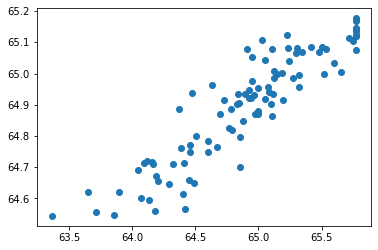

In [ ]:
plt.scatter(y_test,pred_stack)

In [ ]:
#sns.distplot(y_test-pred_stack)

ValueError: ignored